In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# 

In [72]:
palta = pd.read_csv(r'C:/Users/juli_/Desktop/Coderhouse/Palta Coder/avocado.csv', delimiter=',', parse_dates=["Date"])
palta.drop('Unnamed: 0', axis = 1, inplace = True)
palta.sort_values("Date", inplace = True)
palta.reset_index(inplace = True, drop  = True)



In [73]:
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


c:\Users\juli_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


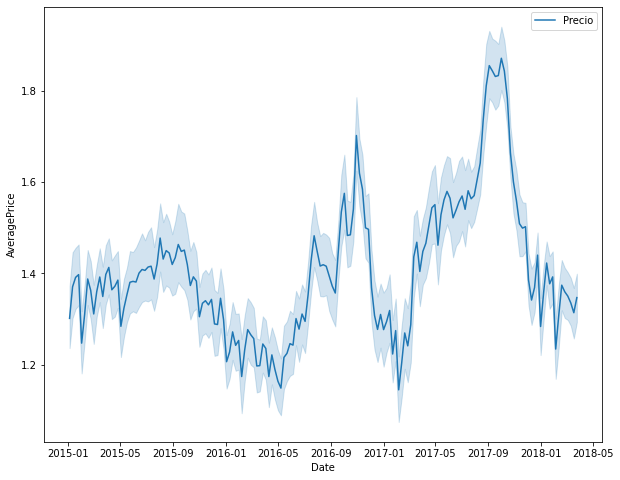

In [74]:
plt.figure(figsize = (10,8))

sns.lineplot(palta["Date"], palta["AveragePrice"], label = 'Precio')


plt.legend()
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
palta['Date']=palta['Date'].map(dt.datetime.toordinal)
X=palta.Date.values
X=X.reshape(-1,1)
y=palta.AveragePrice.values
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)





(12774, 1)
(5475, 1)
(12774, 1)
(5475, 1)


In [76]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred_tree = model.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred_tree = model.predict(X_test)

# Comaparamos con las etiquetas reales
print('Porcentaje de aciertos sobre el conjunto de Entrenamiento:', mean_squared_error(y_train_pred,y_train))
print('Porcentaje de aciertos sobre el conjunto de Evaluación:', mean_squared_error(y_test_pred,y_test))
print('Score en datos de train:', model.score(X_train, y_train)*100)
print('Score en datos de test:', model.score(X_test, y_test)*100)

Porcentaje de aciertos sobre el conjunto de Entrenamiento: 0.14009965017240908
Porcentaje de aciertos sobre el conjunto de Evaluación: 0.13866552615968897
Score en datos de train: 14.196670390679833
Score en datos de test: 13.03900124148305


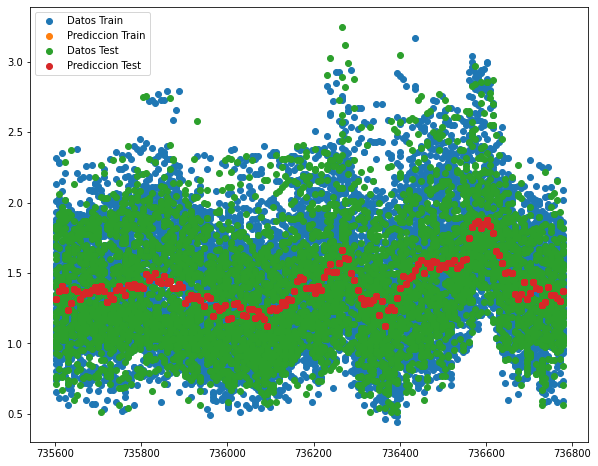

In [78]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train, label = 'Datos Train')
plt.scatter(X_train, y_train_pred_tree, label = 'Prediccion Train')

plt.scatter(X_test, y_test, label = 'Datos Test')
plt.scatter(X_test, y_test_pred_tree, label = 'Prediccion Test')

plt.legend()
plt.show()

In [79]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,y_train)
y_train_pred_knn = knn_reg.predict(X_train)
y_test_pred_knn = knn_reg.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))
print('Score en datos de train:', knn_reg.score(X_train, y_train)*100)
print('Score en datos de test:', knn_reg.score(X_test, y_test)*100)

Error en datos de train: 0.17110551432597462
Error en datos de test: 0.16798080219178083
Score en datos de train: -4.792715939095049
Score en datos de test: -5.345421716653864


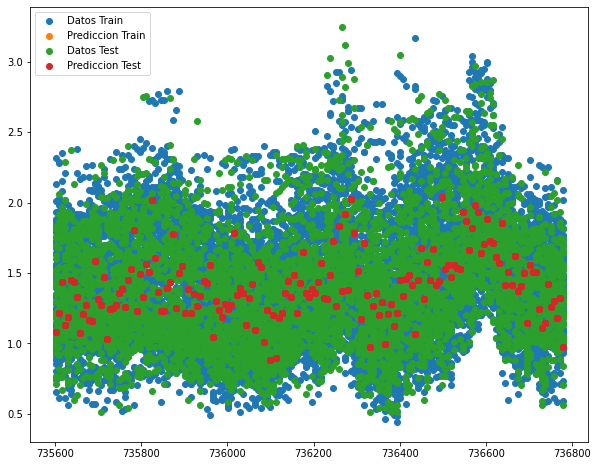

In [80]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train, label = 'Datos Train')
plt.scatter(X_train, y_train_pred_knn, label = 'Prediccion Train')

plt.scatter(X_test, y_test, label = 'Datos Test')
plt.scatter(X_test, y_test_pred_knn, label = 'Prediccion Test')

plt.legend()
plt.show()

In [81]:
from sklearn.model_selection import cross_validate

In [82]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,15,1)

for profundidad in profundidades:
    model = DecisionTreeRegressor(max_depth=profundidad)
    tree_scores = cross_validate(model, X, y, cv=2, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

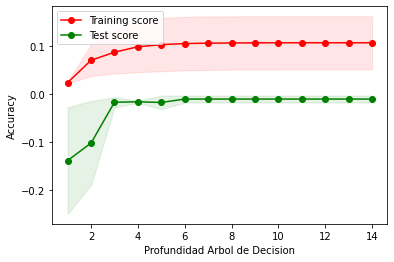

In [83]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [84]:
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

knn_variable = np.arange(1,15,1)

for n_neighbors in knn_variable:
    model = KNeighborsRegressor(n_neighbors = n_neighbors)
    knn_scores = cross_validate(model, X, y, cv=2, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

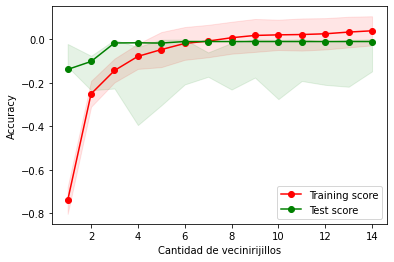

In [85]:
plt.fill_between(knn_variable, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(knn_variable, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(knn_variable, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(knn_variable, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de vecinirijillos')
plt.show()

In [86]:
knn_reg = KNeighborsRegressor(n_neighbors= 1)
knn_reg.fit(X_train,y_train)
y_train_pred_knn = knn_reg.predict(X_train)
y_test_pred_knn = knn_reg.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))
print('Score en datos de train:', knn_reg.score(X_train, y_train)*100)
print('Score en datos de test:', knn_reg.score(X_test, y_test)*100)


Error en datos de train: 0.29061083450759356
Error en datos de test: 0.30415534246575343
Score en datos de train: -77.9831512113609
Score en datos de test: -90.74425411331819
